# Drug Recommendation using Machine Learning 

### By Soorya Parthiban

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the libraries

In [42]:
drug_df = pd.read_csv("drug200.csv")

In [43]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.36,drugY
1,47,M,LOW,HIGH,13.09,drugC
2,47,M,LOW,HIGH,10.11,drugC
3,28,F,NORMAL,HIGH,7.80,drugX
4,61,F,LOW,HIGH,18.04,drugY


In [44]:
drug_df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.57,drugC
196,16,M,LOW,HIGH,12.01,drugC
197,52,M,NORMAL,HIGH,9.89,drugX
198,23,M,NORMAL,NORMAL,14.02,drugX
199,40,F,LOW,NORMAL,11.35,drugX


In [45]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [46]:
drug_df.describe()

,Age,Na_to_K
count,200.00,200.00
mean,44.31,16.08
std,16.54,7.22
min,15.00,6.27
25%,31.00,10.45
50%,45.00,13.94
75%,58.00,19.38
max,74.00,38.25


### Data Pre-Processing

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
drug_df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [49]:
drug_df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [50]:
drug_df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

#### Label Encoding Sex and Cholesterol columns

In [51]:
drug_df['Sex'] = LabelEncoder().fit_transform(drug_df['Sex'])
drug_df['Cholesterol'] = LabelEncoder().fit_transform(drug_df['Cholesterol'])

In [52]:
drug_df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [53]:
drug_df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [54]:
drug_df['Sex'].value_counts()

Sex
1    104
0     96
Name: count, dtype: int64

In [55]:
drug_df['Cholesterol'].value_counts()

Cholesterol
0    103
1     97
Name: count, dtype: int64

#### Creating dummy variables in BP column

In [56]:
dummy_BP = pd.get_dummies(drug_df["BP"], prefix="BP", prefix_sep="_")

In [58]:
dummy_BP.head()

,BP_HIGH,BP_LOW,BP_NORMAL
0,True,False,False
1,False,True,False
2,False,True,False
3,False,False,True
4,False,True,False


In [59]:
dummy_BP.drop("BP_NORMAL", axis=1, inplace=True)

In [60]:
dummy_BP.head()

,BP_HIGH,BP_LOW
0,True,False
1,False,True
2,False,True
3,False,False
4,False,True


#### Concating BP dummies to orginal dataset

In [61]:
drug_df.drop("BP", axis=1, inplace=True)

In [62]:
drug_df = pd.concat([drug_df, dummy_BP], axis=1)

In [63]:
drug_df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW
0,23,0,0,25.36,drugY,True,False
1,47,1,0,13.09,drugC,False,True
2,47,1,0,10.11,drugC,False,True
3,28,0,0,7.80,drugX,False,False
4,61,0,0,18.04,drugY,False,True


### Data Visualization

Text(0, 0.5, 'Count')

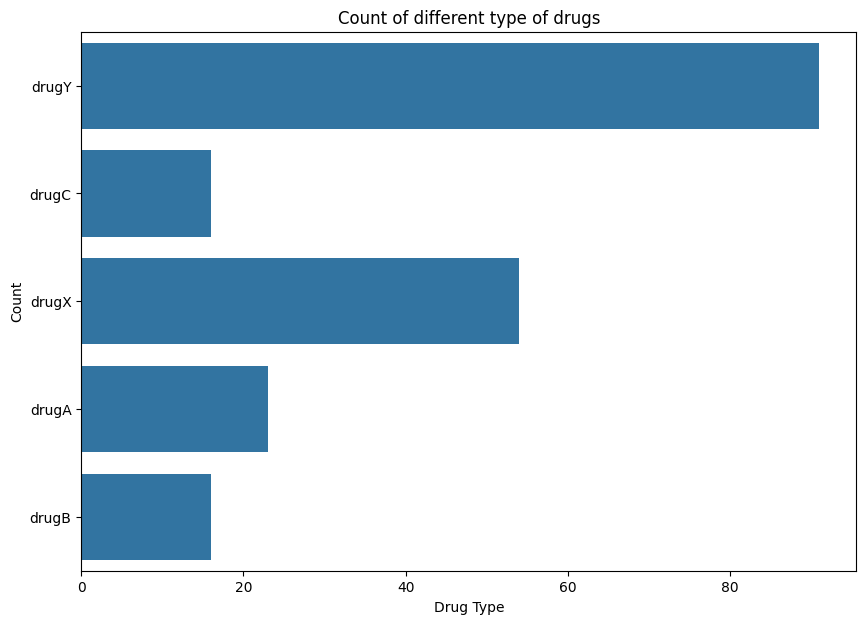

In [64]:
plt.figure(figsize=(10,7))
sns.countplot(drug_df["Drug"])
plt.title("Count of different type of drugs")
plt.xlabel("Drug Type")
plt.ylabel("Count")

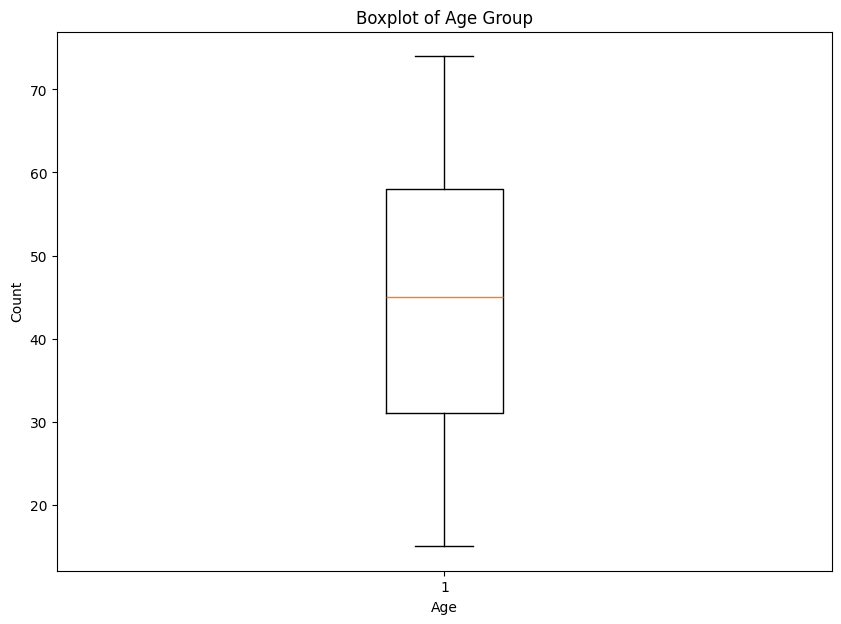

In [65]:
plt.figure(figsize=(10,7))
plt.boxplot(drug_df["Age"])
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

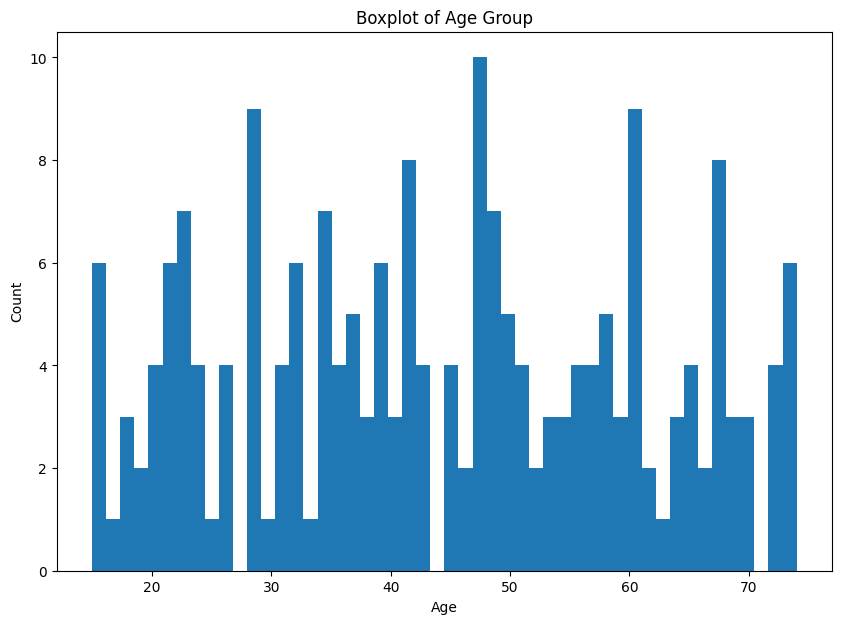

In [66]:
plt.figure(figsize=(10,7))
plt.hist(drug_df["Age"], bins=50)
plt.title("Boxplot of Age Group")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Using LazyPredict to choose the best model

In [56]:
!pip install lazypredict


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [67]:
from sklearn.model_selection import train_test_split
# from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
X = drug_df.drop("Drug", axis=1)
y = drug_df["Drug"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.3)

In [70]:
print(X_train.shape, X_test.shape)

(140, 6) (60, 6)


In [71]:
X_train[:5]

,Age,Sex,Cholesterol,Na_to_K,BP_HIGH,BP_LOW
6,49,0,0,16.27,False,False
128,47,1,1,33.54,False,True
40,73,0,0,19.22,False,False
108,72,1,1,9.68,True,False
140,49,1,1,6.27,True,False


In [72]:
print(y_train.shape, y_test.shape)

(140,) (60,)


In [31]:
!pip3 install lazypredict


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [73]:
from lazypredict.Supervised import LazyClassifier

In [35]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 31/31 [00:00<00:00, 48.52it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 7
[LightGBM] [Info] Start training from score -2.051271
[LightGBM] [Info] Start training from score -3.332205
[LightGBM] [Info] Start training from score -2.456736
[LightGBM] [Info] Start training from score -1.304056
[LightGBM] [Info] Start training from score -0.736950
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

### Building ML Models

#### LGBM Classifier Model

In [74]:
from lightgbm import LGBMClassifier

In [75]:
lgbm_clf = LGBMClassifier(n_estimators=500)

In [76]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 6
[LightGBM] [Info] Start training from score -2.108429
[LightGBM] [Info] Start training from score -2.376693
[LightGBM] [Info] Start training from score -2.639057
[LightGBM] [Info] Start training from score -1.330725
[LightGBM] [Info] Start training from score -0.798508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(n_estimators=500)

In [77]:
y_preds_lgbm = lgbm_clf.predict(X_test)

In [78]:
print(accuracy_score(y_test, y_preds_lgbm))

0.95


Text(0.5, 1.0, 'Confusion Matrix for LGBM Classifier Model')

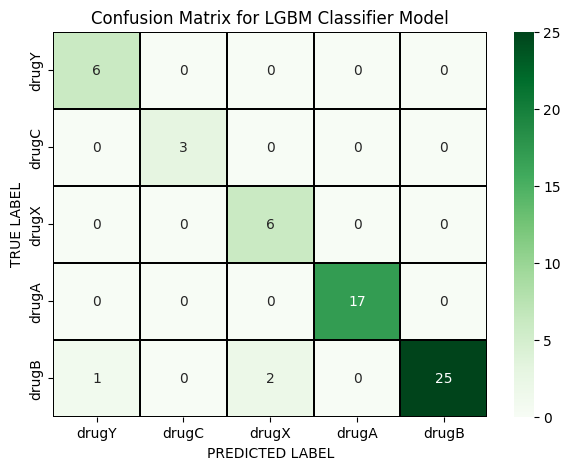

In [79]:
cm = confusion_matrix(y_test, y_preds_lgbm)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LGBM Classifier Model')

#### Bagging Classifier Model 

In [80]:
from sklearn.ensemble import BaggingClassifier

In [81]:
bg_clf = BaggingClassifier(n_estimators=500)

In [82]:
bg_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=500)

In [83]:
y_preds_bg = bg_clf.predict(X_test)

In [84]:
print(accuracy_score(y_test, y_preds_bg))

1.0


Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

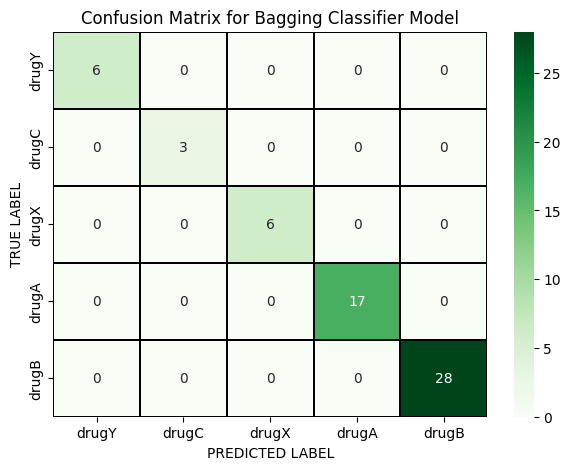

In [85]:
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

#### Decision Tree Model

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt_clf = DecisionTreeClassifier()

In [88]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
y_preds_dt = dt_clf.predict(X_test)

In [90]:
print(accuracy_score(y_test, y_preds_dt))

1.0


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier Model')

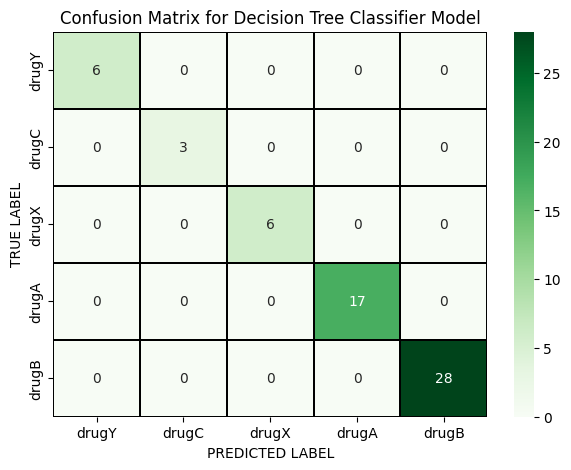

In [91]:
cm = confusion_matrix(y_test, y_preds_dt)

x_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']
y_axis_labels = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB']

f, ax = plt.subplots(figsize =(7,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier Model')

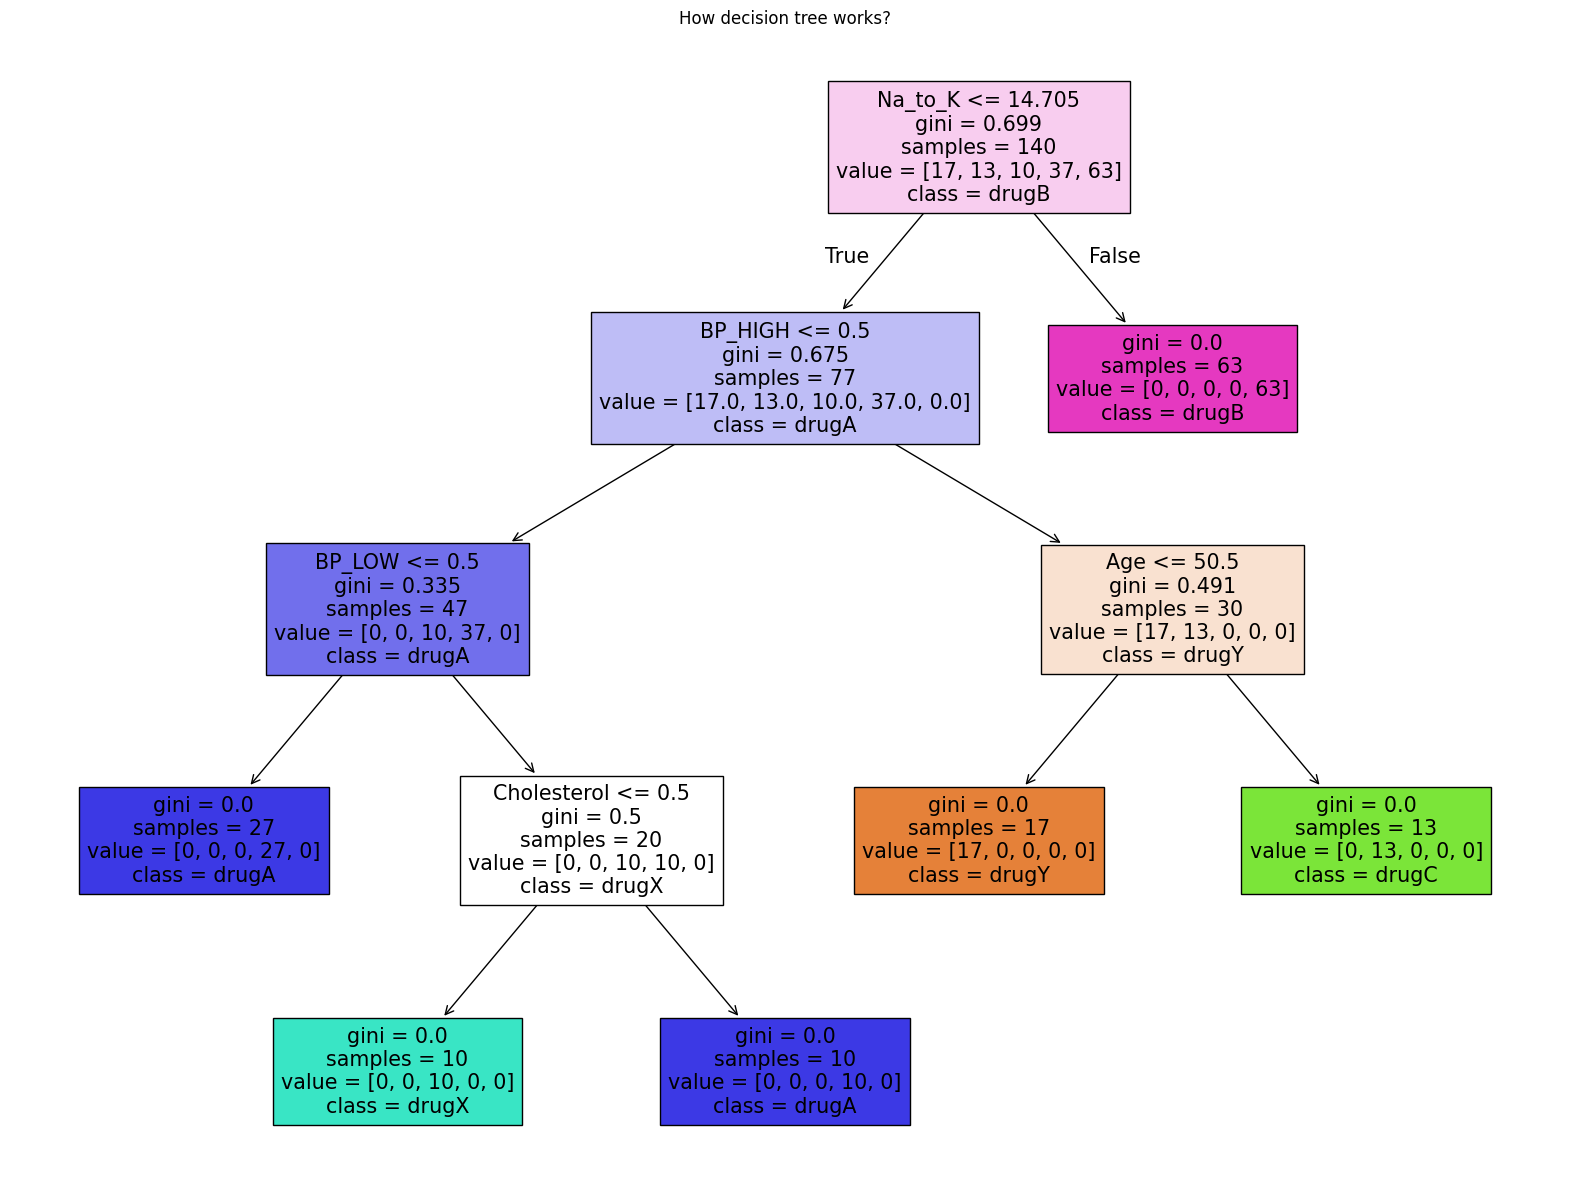

In [92]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt_clf, feature_names = list(X), class_names = ['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], filled = True)
plt.title('How decision tree works?')
plt.show()

### Saving the best model

In [93]:
from joblib import dump
MODEL_NAME = "drug-recommender.pkl"
dump(lgbm_clf, MODEL_NAME)

['drug-recommender.pkl']

### THE END